<a href="https://colab.research.google.com/github/kaindoh/Financial-Inclusion-Data-Analysis/blob/master/Individuals_are_most_likely_to_have_or_use_a_bank_account.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing libraries**

In [0]:
#importing libaries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import norm ,ttest_ind,ttest_1samp
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression


# **Loading Files**

In [0]:
#loading files using pandas
df=pd.read_csv("Financial Dataset - 1.csv")
descr=pd.read_csv("VariableDefinitions.csv")

In [5]:
#Displaying the description
descr

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


#**Understanding the Dataset**

In [6]:
#previwing the the dataset randomly
df.sample(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
114,Kenya,2018,uniqueid_115,No,Rural,No,8.0,72.0,Female,Parent,Widowed,No formal education,Remittance Dependent
19642,Tanzania,2017,uniqueid_4840,No,Rural,Yes,2.0,21.0,Female,Spouse,Single/Never Married,Secondary education,No Income
14578,Rwanda,2016,uniqueid_8511,No,Rural,Yes,3.0,53.0,Male,Head of Household,Married/Living together,Primary education,Informally employed
7240,Rwanda,2016,uniqueid_1173,No,Rural,No,1.0,77.0,Female,Head of Household,Widowed,Primary education,Farming and Fishing
4766,Kenya,2018,uniqueid_4767,Yes,Rural,Yes,8.0,40.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing


In [7]:
#The Decsription of the dataset in terms of rows and columns
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


(23524, 13)

In [8]:
#Statistics review
df.describe()


,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# **Creating A Hypothesis**

>$H_0: An Individual Has  A  Bank Account$

>$H_1:An Individual Has No Bank Account$

# **Cleaning dataset**

In [9]:
#knowing the column names
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [0]:
#Getting the column names uniform
df.columns=df.columns.str.lower().str.replace(' ','_')

In [11]:
#display of the uniform columns
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [12]:
#checking for missing values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [13]:
#checking the data types for various columns
df.dtypes


country                    object
year                        int64
uniqueid                   object
has_a_bank_account         object
type_of_location           object
cell_phone_access          object
household_size            float64
respondent_age            float64
gender_of_respondent       object
the_relathip_with_head     object
marital_status             object
level_of_educuation        object
type_of_job                object
dtype: object

In [0]:
#Dropping null values since tey are not as many
df.dropna(inplace=True)

In [15]:
#confirming whether the null values are dropped
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

In [16]:
#checking for duplcates
df[df.duplicated()]

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job


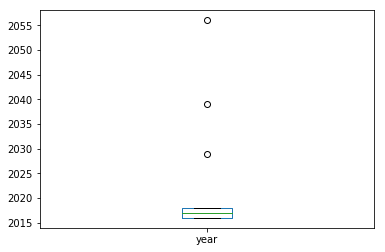

In [17]:
#checking for outliers
df['year'].plot(kind='box')

In [18]:
#Getting unique years
df.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [0]:
#Removing 2029 2056 and 2038
year_outliers=df[df.year>2019].index
df.drop(year_outliers,inplace=True)

In [20]:
#Displaying the remaining years
df.year.unique()

array([2018, 2016, 2017])

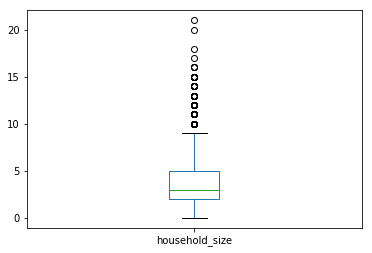

In [21]:
#checking for outliers in household_size
df.household_size.plot(kind='box')

In [22]:
#Getting unique values of household_size
df.household_size.unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21.,  0., 18., 17., 20.])

I will not drop household_size outliers because a maximum of 21 people in one house is reasonable

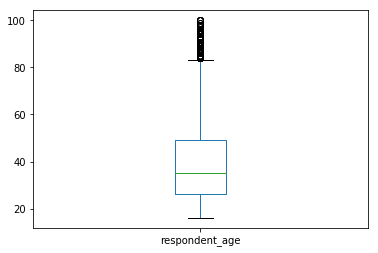

In [23]:
#checking for outliers in respondent_age
df.respondent_age.plot(kind='box')

In [24]:
#Getting unique values of respondent_age
df.respondent_age.unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

I will not drop respondent_age outliers because a maximum of 100 is also reasonable

# **Statistical Overview**

In [25]:
#identifying whether data is correlated
df.corr()

,year,household_size,respondent_age
year,1.000000,-0.052484,-0.018554
household_size,-0.052484,1.000000,-0.119671
respondent_age,-0.018554,-0.119671,1.000000


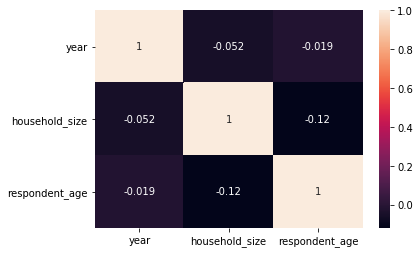

In [26]:
#creating a heatmap of the correlated values
sns.heatmap(df.corr(),annot=True)

This shows that household size respondent_age and year are inversely and weakly correlated

In [27]:
#checking whether the data is skewed
df.skew()

year              0.042833
household_size    0.974183
respondent_age    0.840615
dtype: float64


household_size and respondent_age are skewed to the right


In [28]:
#Finding the kurtosis
df.kurt()

year             -1.611829
household_size    1.153836
respondent_age    0.098268
dtype: float64

> year is platykurtic

> household_size is leptokurtic

> respondent_age is mesokurtic

In [29]:
#Finding the standard deviation
df.std()

year               0.849136
household_size     2.281275
respondent_age    16.519905
dtype: float64

respondent_age has the the greatest variance meaning the values of age are so far from the mean

In [31]:
#Getting the statistical overview of the  data
df.describe(include='all')

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
count,23340,23340.000000,23340,23340,23340,23340,23340.000000,23340.000000,23340,23340,23340,23340,23340
unique,4,NaN,8687,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1797,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8683,NaN,4,20044,14263,17331,NaN,NaN,13766,12729,10698,12688,6361
mean,NaN,2016.977464,NaN,NaN,NaN,NaN,3.688560,38.807069,NaN,NaN,NaN,NaN,NaN
std,NaN,0.849136,NaN,NaN,NaN,NaN,2.281275,16.519905,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


# Visualization of The Data

In [32]:
#Getting the correct names of the columns
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [34]:
#Getting the unique elements in the type of location columns
df.type_of_location.unique()

array(['Rural', 'Urban'], dtype=object)

In [36]:
#Grouping the elemnts in the type of location inorder to get the frequency 
location=df.groupby('type_of_location')['type_of_location'].count()
location

type_of_location
Rural    14263
Urban     9077
Name: type_of_location, dtype: int64

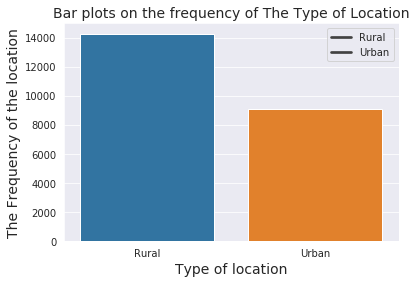

In [50]:
#plotting a bar plots on the type of location

sns.set_style("darkgrid")
sns.barplot(location.index,location.values)
plt.xlabel("Type of location",fontsize=14)
plt.ylabel("The Frequency of the location",fontsize=14)
plt.title("Bar plots on the frequency of The Type of Location",fontsize=14)
plt.legend(labels=location.index)
plt.show()



In [0]:
#Grouping those who had the bank account and getting their frequency
bank=df.groupby('has_a_bank_account')['has_a_bank_account'].count()

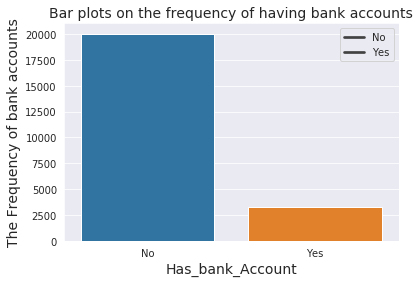

In [52]:
#plotting a bar plot of those who had bank account and those who dint

sns.set_style("darkgrid")
sns.barplot(bank.index,bank.values)
plt.xlabel("Has_bank_Account",fontsize=14)
plt.ylabel("The Frequency of bank accounts",fontsize=14)
plt.title("Bar plots on the frequency of having bank accounts",fontsize=14)
plt.legend(labels=bank.index)
plt.show()


In [53]:
#Getting unique values of cell phone access
df.cell_phone_access.unique()

array(['Yes', 'No'], dtype=object)

In [54]:
#Grouping the elements of cell phone access by their frequency
cell_phone_access=df.groupby('cell_phone_access')['cell_phone_access'].count()
cell_phone_access


cell_phone_access
No      6009
Yes    17331
Name: cell_phone_access, dtype: int64

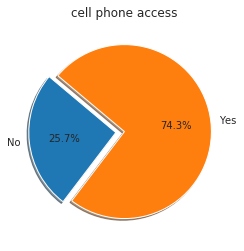

In [55]:
#plotting a pie chart on cell phone access
explode=[0.1,0]
plt.pie(cell_phone_access,labels=cell_phone_access.index,autopct="%1.1f%%",shadow=True,startangle=140,explode=explode)
plt.title("cell phone access")
plt.show()

In [57]:
#Grouping the gender and getting their frequency
gender=df.groupby('gender_of_respondent')['gender_of_respondent'].count()
gender

gender_of_respondent
Female    13766
Male       9574
Name: gender_of_respondent, dtype: int64

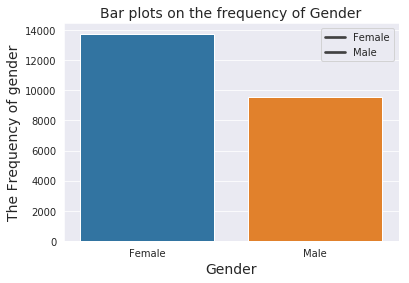

In [58]:
#plotting bar plots of gender
sns.set_style("darkgrid")
sns.barplot(gender.index,gender.values)
plt.xlabel("Gender",fontsize=14)
plt.ylabel("The Frequency of gender",fontsize=14)
plt.title("Bar plots on the frequency of Gender",fontsize=14)
plt.legend(labels=gender.index)
plt.show()


In [63]:
#Getting unique values of type of job
df.type_of_job.unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [77]:
#Grouping the type of job to get the frequency
type_of_job=df.groupby('type_of_job')['type_of_job'].count().sort_values(ascending=False)
type_of_job

type_of_job
Self employed                   6361
Informally employed             5549
Farming and Fishing             5422
Remittance Dependent            2508
Other Income                    1077
Formally employed Private       1047
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: type_of_job, dtype: int64

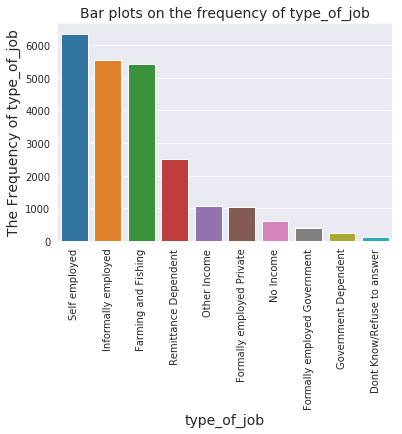

In [78]:
sns.set_style("darkgrid")
sns.barplot(type_of_job.index,type_of_job.values)
plt.xlabel("type_of_job",fontsize=14)
plt.ylabel("The Frequency of type_of_job",fontsize=14)
plt.title("Bar plots on the frequency of type_of_job",fontsize=14)
plt.xticks(rotation=90)
plt.show()


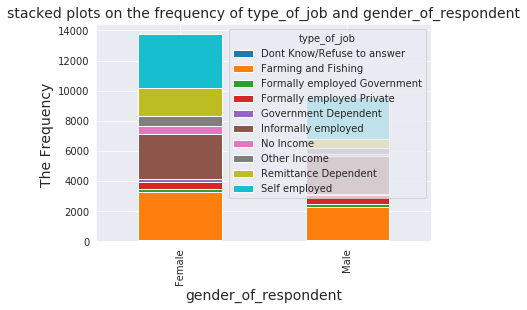

In [79]:
#comparing the gender to type of job
df.groupby(['gender_of_respondent','type_of_job']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel("gender_of_respondent",fontsize=14)
plt.ylabel("The Frequency ",fontsize=14)
plt.title("stacked plots on the frequency of type_of_job and gender_of_respondent",fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [81]:
#getting unique values of marital status
df.marital_status.unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [82]:
#Grouping to get the frequency of marital status
marital_status= df.groupby('marital_status')['marital_status'].count().sort_values(ascending=False)
marital_status

marital_status
Married/Living together    10698
Single/Never Married        7902
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64

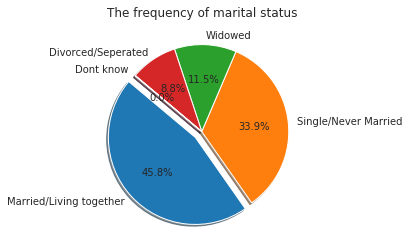

In [83]:
#plotting a pie chart on marital status
explode=[0.1,0,0,0,0]
plt.pie(marital_status,labels=marital_status.index,autopct="%1.1f%%",shadow=True,startangle=140,explode=explode)
plt.title("The frequency of marital status")
plt.show()

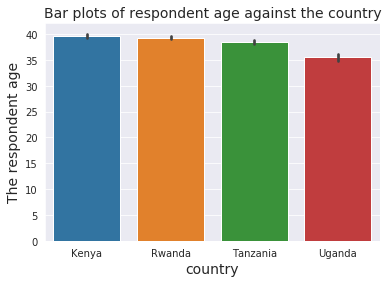

In [85]:
#plotting bar plots on country and respondent age
sns.barplot(df.country,df.respondent_age)
plt.xlabel("country",fontsize=14)
plt.ylabel("The respondent age",fontsize=14)
plt.title("Bar plots of respondent age against the country",fontsize=14)
plt.show()

In [86]:
#Getting the frequency of the unique household size
household=df.groupby('household_size')['household_size'].count()
household

household_size
0.0       36
1.0     3928
2.0     5072
3.0     3513
4.0     3199
5.0     2716
6.0     2028
7.0     1378
8.0      740
9.0      354
10.0     191
11.0      66
12.0      66
13.0      25
14.0       9
15.0      11
16.0       4
17.0       1
18.0       1
20.0       1
21.0       1
Name: household_size, dtype: int64

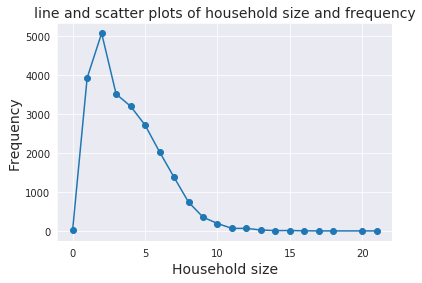

In [90]:
#plotting scatter and lineplot of household size
plt.scatter(household.index,household.values)
plt.plot(household.index,household.values)
plt.xlabel("Household size",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("line and scatter plots of household size and frequency",fontsize=14)
plt.show()

It is evident that 5 is the common number of household size
Household size is normally distributed as is skewed to the right

In [92]:
#getting the frequency of unique ages
respondent_age=df.groupby('respondent_age')['respondent_age'].count()
respondent_age

respondent_age
16.0      459
17.0      474
18.0      583
19.0      466
20.0      622
21.0      469
22.0      560
23.0      580
24.0      558
25.0      785
26.0      611
27.0      566
28.0      742
29.0      514
30.0     1043
31.0      462
32.0      707
33.0      526
34.0      515
35.0      831
36.0      456
37.0      432
38.0      551
39.0      370
40.0      682
41.0      314
42.0      444
43.0      368
44.0      252
45.0      561
         ... 
71.0       94
72.0       97
73.0       90
74.0       62
75.0      148
76.0       72
77.0       56
78.0       82
79.0       57
80.0      124
81.0       24
82.0       40
83.0       33
84.0       20
85.0       55
86.0       25
87.0       15
88.0       24
89.0       16
90.0       28
91.0        5
92.0        7
93.0        4
94.0        5
95.0       18
96.0        3
97.0        1
98.0        6
99.0        2
100.0       5
Name: respondent_age, Length: 85, dtype: int64

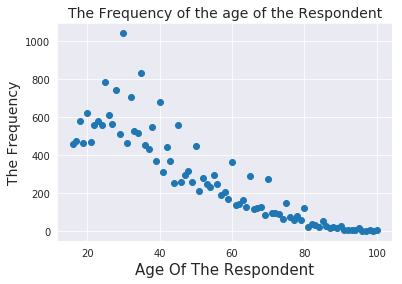

In [94]:
#plotting scatter plot of the respondent age
plt.scatter(respondent_age.index,respondent_age.values)
plt.xlabel("Age Of The Respondent",fontsize=15)
plt.ylabel("The Frequency",fontsize=14)
plt.title("The Frequency of the age of the Respondent",fontsize=14)
plt.show()


The frequency of age is inversely correlated to the age  of the respondent 

# **Trying Different Reduction Algorithims**

# 1.Principle Component Analysis(PCA) using: Random Forest Classiffier

In [0]:
#dropping uniqueid for the purpose of creating dummy variables
df.drop('uniqueid',axis=1,inplace=True)

In [97]:
#confirming that uniqueid is actually dropped
df.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [111]:
#Creating x as te feature set and y as the target set
x=df.drop('has_a_bank_account',1)
y=df['has_a_bank_account']

#getting categorical data into dummy variables
x=pd.get_dummies(x)

#making the y variable into 1 column
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

#splitting dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#Normalization
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#Applying PCA
pca=PCA()
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

#Explained Variance Ratio
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[1.01711630e-01 7.25378488e-02 6.97245816e-02 6.24751896e-02
 5.16625861e-02 4.62446560e-02 4.01541854e-02 3.56443263e-02
 3.48771440e-02 3.11665118e-02 2.97509140e-02 2.71011249e-02
 2.62719478e-02 2.52395328e-02 2.50320421e-02 2.47680305e-02
 2.46704336e-02 2.42959986e-02 2.41589570e-02 2.39212523e-02
 2.37282076e-02 2.32792357e-02 2.20882579e-02 2.11141236e-02
 1.97155548e-02 1.92430265e-02 1.54275762e-02 1.32384154e-02
 1.14065685e-02 1.11867261e-02 9.38057201e-03 8.78284265e-03
 1.75914422e-31 1.75669261e-32 6.74718296e-33 3.36769685e-33
 2.55923183e-33 2.18011466e-33 1.82595827e-33 1.03349241e-33
 2.75970982e-35]


In [99]:
#Getting the size of explained_variance
explained_variance.shape

(41,)

In [108]:
#using first principal
pca=PCA(n_components=1)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

#Training and Making Predictions
Classifier=RandomForestClassifier(max_depth=2,random_state=0)
Classifier.fit(x_train,y_train)

#predicting the test set results
y_pred=Classifier.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Perfomance evaluation
print('Accuracy',accuracy_score(y_test,y_pred))


[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of 86.4 % is quite high

In [110]:
#Results with Second principle
pca=PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

#Training and Making Predictions
Classifier=RandomForestClassifier(max_depth=2,random_state=0)
Classifier.fit(x_train,y_train)

#predicting the test set results
y_pred=Classifier.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Perfomance evaluation
print('Accuracy',accuracy_score(y_test,y_pred))


[[4009   27]
 [ 551   81]]
Accuracy 0.87617823479006


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of 87.61% is the highest among the three possible components hence using second prinsiple is more appropriate for making predictions

In [112]:
#Results with third principle
pca=PCA(n_components=3)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

#Training and Making Predictions
Classifier=RandomForestClassifier(max_depth=2,random_state=0)
Classifier.fit(x_train,y_train)

#predicting the test set results
y_pred=Classifier.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Perfomance evaluation
print('Accuracy',accuracy_score(y_test,y_pred))


[[4036    0]
 [ 631    1]]
Accuracy 0.8648243359040274


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of 86.48% is equivalent to that one on the first principle

From above experiment we attained accuracy of
86.46%  on first principle,87.62% on second principle and 86.50% on third principle.
Therefore the second principle achieved the highest accuracy in making predictions

#2.linear Regression

In [123]:
y=df['has_a_bank_account'].values
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

#splitting dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#creating and training a model using linear regression
lm =LinearRegression()
results=lm.fit(x_train,y_train)

#Getting the predictions
predictions=lm.predict(x_test)


print("r2_score",r2_score(y_test,predictions))

#Getting the coefficients
(lm.coef_, lm.intercept_)  
      
#etting the model
x2 = sm.add_constant(x.values)  
model = sm.OLS(y, x2).fit()  
print(model.summary())

r2_score 0.2666795017790725
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     261.3
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:32:16   Log-Likelihood:                -4920.3
No. Observations:               23340   AIC:                             9907.
Df Residuals:                   23307   BIC:                         1.017e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.5e-05   

Most intercept are less than significance level 0.05 hence the hypothesis is statistically significant

0.2667 approximation is not a very good fit hence linear reggression is not an appropriate model for this dataset

# 3.Linear Discriminant Analysis using :Random Forest Classiffier

In [113]:

#getting categorical data into dummy variables
x=pd.get_dummies(x)

#creating the predicted variable
y=df['has_a_bank_account'].values
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

#splitting dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


#Normalization
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#reduction of the dimensions using LDA
lda=LDA(n_components=1)
x_train=lda.fit_transform(x_train,y_train)
x_test=lda.transform(x_test)

#Training and Making Predictions
Classifier=RandomForestClassifier(max_depth=2,random_state=0)
Classifier.fit(x_train,y_train)

#predicting the test set results
y_pred=Classifier.predict(x_test)

#Testing Accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , str(accuracy_score(y_test, y_pred)))

[[3992   44]
 [ 475  157]]
Accuracy 0.8888174807197944


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# **Challenge my solution**

## Using Logistic Linear reggression instead of Random Forest Classifier to make predictions

In [126]:

#getting categorical data into dummy variables
x=pd.get_dummies(x)

#creating the predicted variable
y=df['has_a_bank_account'].values
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

#splitting dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


#Normalization
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#reduction of the dimensions using LDA
lda=LDA(n_components=1)
x_train=lda.fit_transform(x_train,y_train)
x_test=lda.transform(x_test)

#Training and Making Predictions using LogisticRegression
from sklearn.linear_model import LogisticRegression
Classifier= LogisticRegression()
Classifier.fit(x_train,y_train)

#predicting the test set results
y_pred=Classifier.predict(x_test)

#Testing Accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , str(accuracy_score(y_test, y_pred)))

[[3935  101]
 [ 425  207]]
Accuracy 0.8873179091688089


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


using logistic regrssion for prediction brings a lower accuracy  of 88.8% compared to random forest classiffier which has 88.9%.
**However the difference is minimal **

#**Conclusion**

LDA with random Forest classifier  has the highest accuracy of 88.89% which makes it the best reduction method and the best prediction algorithim in my experiment